# STAT207 Final Project - INSERT TITLE HERE

YOUR NAMES

## 1. Introduction

In [77]:
#Imports here
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from scipy.stats import t

In [19]:
df = pd.read_csv('ames.csv')

In [20]:
df.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [21]:
df['Mo.Sold'].unique()

array([ 5,  6,  4,  3,  1,  2,  7, 10,  8, 11,  9, 12])

In [22]:
df['Central.Air'].unique()

array(['Y', 'N'], dtype=object)

In [23]:
df['Year.Built'].unique()

array([1960, 1961, 1958, 1968, 1997, 1998, 2001, 1992, 1995, 1999, 1993,
       1990, 1985, 2003, 1988, 2010, 1951, 1978, 1977, 1974, 2000, 1970,
       1971, 1975, 2009, 2007, 2005, 2004, 2002, 2006, 1996, 1994, 2008,
       1980, 1979, 1984, 1920, 1965, 1967, 1963, 1962, 1976, 1972, 1966,
       1959, 1964, 1950, 1952, 1949, 1940, 1954, 1955, 1957, 1956, 1953,
       1948, 1900, 1910, 1927, 1915, 1945, 1929, 1938, 1923, 1928, 1890,
       1885, 1922, 1925, 1939, 1942, 1936, 1930, 1921, 1912, 1917, 1907,
       1875, 1969, 1947, 1946, 1987, 1941, 1924, 1914, 1931, 1919, 1989,
       1896, 1973, 1991, 1981, 1986, 1916, 1926, 1935, 1892, 1898, 1880,
       1882, 1937, 1902, 1934, 1982, 1983, 1932, 1918, 1904, 1905, 1872,
       1893, 1906, 1908, 1911, 1895, 1879, 1901, 1913])

In [24]:
df['Overall.Qual'].unique()

array([ 6,  5,  7,  8,  9,  4,  3,  2, 10,  1])

In [25]:
df['Sale.Condition'].unique()

array(['Normal', 'Partial', 'Family', 'Abnorml', 'Alloca', 'AdjLand'],
      dtype=object)

In [26]:
df['Garage.Area'].dtype

dtype('float64')

In [27]:
df['Garage.Area'].dropna

<bound method Series.dropna of 0       528.0
1       730.0
2       312.0
3       522.0
4       482.0
        ...  
2925    588.0
2926    484.0
2927      0.0
2928    418.0
2929    650.0
Name: Garage.Area, Length: 2930, dtype: float64>

In [28]:
df['price']

0       215000
1       105000
2       172000
3       244000
4       189900
         ...  
2925    142500
2926    131000
2927    132000
2928    170000
2929    188000
Name: price, Length: 2930, dtype: int64

In [53]:
df = df[['price','Mo.Sold','Central.Air','Year.Built','Overall.Qual','Sale.Condition','Garage.Area', 'Yr.Sold']]
df.head()

,price,Mo.Sold,Central.Air,Year.Built,Overall.Qual,Sale.Condition,Garage.Area,Yr.Sold
0,215000,5,Y,1960,6,Normal,528.0,2010
1,105000,6,Y,1961,5,Normal,730.0,2010
2,172000,6,Y,1958,6,Normal,312.0,2010
3,244000,4,Y,1968,7,Normal,522.0,2010
4,189900,3,Y,1997,5,Normal,482.0,2010


## 2. Descriptive Analytics

We would like to study the relationship between price, which month the house was sold, and the overal quality of the house.

Firstly, we visualize the relationship between month the house sold and the price.

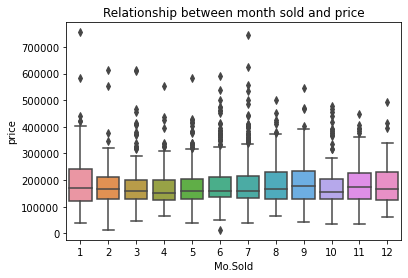

In [41]:
sns.boxplot(x="Mo.Sold",y='price', data=df)
plt.title('Relationship between month sold and price')
plt.show()

1. <u>Compare Measures of Center</u>: The median price does not change a lot through the entire year.

2. <u>Compare Outliers</u>: all months have outliers. These outliers are high.

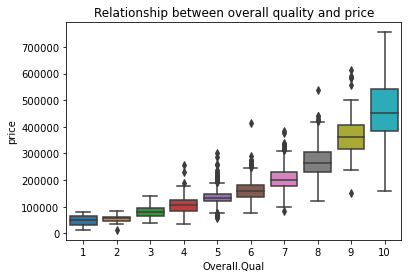

In [47]:
sns.boxplot(x="Overall.Qual",y='price', data=df)
plt.title('Relationship between overall quality and price')
plt.show()

1. <u>Compare Measures of Center</u>: The median price is higher as quality level is higher.

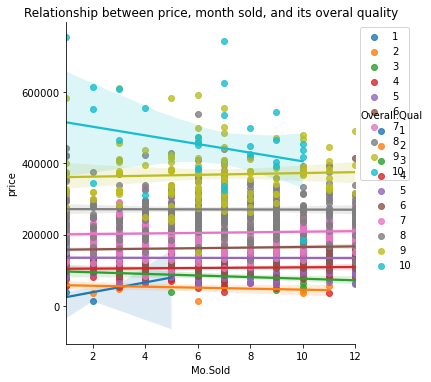

In [42]:
sns.lmplot(x="Mo.Sold",y='price', hue='Overall.Qual', data=df)
plt.title('Relationship between price, month sold, and its overal quality')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

* <u>Intercept Comparison</u>: It looks like the intercept of best fit lines are sorted by the quality level, higher the quality, greater the intercept. 
* <u>Slope Comparison</u>: It looks like the slopes of quality level between 2-9 are similar and very small. However, quality 10 has a negative slope and quality 1 has a positive slope. 

Intepretation of the statistics
- Based on the statistics summary, the compare measure of center in graph 2 and the intercept comparison in graph 3 indicates the positive relationship between house prcing and the overall quality. 
- Measure of center and slope comparison show that most of the house pricing are not affected by which month it was sold. 
- However, it is necessary to notice that house which has extreme high quality(10) is more likely to be sold in higher price in earlier months; conversely, house which has extreme low quality(1) is more likely to be sold in higher price in later months.

Value of this intepretation
- Therefore, it is easy to provide a reference of price range to our clients who would like to buy a house based on the evaluation of the overall quality. 
- What's more, due to the special property of extreme high and low quality houses, we can choose to sell high quality house in prior to the low quality one.

## 3. Inference

Is there an association between the Central air condition(Central.Air) and the Year Built(Yr.Builr) in all residential homes in Ames, lwoa?


$H_0: \mu_{1}-\mu_{2}= 0$

$H_A: \mu_{1}-\mu_{2}\neq 0$

𝜇1 = average year built value for homes has central air condtion
𝜇2 = average year built value for homes does not have central air condtion

Next, we should check our Central Limit Theorem conditions (for sample mean differences) to make sure that the decisions that we make with our hypothesis testing procedure are valid.

1. Sample of homes which have central air is randomly sampled.
2. $n_{1}=2734<10$% of all homes who have central air.
3. Sample of homes which do not have central air is randomly sampled.
4. $n_{2}=196<10$% of homes do not have central air.
5. $n_{2}=196>30$ 
5. $n_{1}=2734>30$
6. We can assume that there is no pairwise relationship between the houses in both groups in this sample.


All of the conditions are met, so we can proceed with conducting this hypothesis test.

In [48]:
df['Central.Air'].value_counts()

Y    2734
N     196
Name: Central.Air, dtype: int64

In [56]:
df['Year.Built'].head()

0    1960
1    1961
2    1958
3    1968
4    1997
Name: Year.Built, dtype: int64

In [67]:
mean_y = df[df['Central.Air'] == 'Y']['Year.Built'].mean()

In [68]:
mean_n = df[df['Central.Air'] == 'N']['Year.Built'].mean()

In [72]:
n_y=2734
n_n = 196

std_y=df[df['Central.Air'] == 'Y']['Year.Built'].std()
std_n=df[df['Central.Air'] == 'N']['Year.Built'].std()


In [73]:
point_estimate=mean_y-mean_n
print('Point Estimate: ', point_estimate)

Point Estimate:  44.98821342728752


In [74]:
standard_error=np.sqrt((std_y**2)/n_y + (std_n**2)/n_n)
print('Standard Error: ', standard_error)

Standard Error:  1.594038437997751


In [75]:
test_stat=(point_estimate-0)/standard_error
print('Test statistic (ie. t-score of the point estimate):',test_stat)

Test statistic (ie. t-score of the point estimate): 28.222790840474698


In [78]:
pvalue=2*(1-t.cdf(np.abs(test_stat), df=195))

print('p-value: ',pvalue)

p-value:  0.0


Since p-value = 0, we can suggest that we can reject the null hypothesis, which means that there is an association between the Central air condition(Central.Air) and the Year Built(Year.Built) in all residential homes in Ames, lwoa.

## 4. Linear Regression

## 5. Logistic Regression

## Any other type of analysis/question you want to explore with this dataset.

<u>Why?</u>: Sometimes undergraduate students will put the research projects that they did for their classes in their resumes when applying for graduate schools, internships, and jobs. If you're interested in showcasing cool analyses to write on your resume, this section could help with that. **(This section is not worth any points though).**

## 6. Conclusion